In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import gffutils
import pybedtools
import re
import numpy as np

v19db_filename = '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'
v19db = gffutils.FeatureDB(v19db_filename)

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

splicing_feature_data = pd.read_csv('{}/splicing_feature_data.csv'.format(folder), index_col=0)
splicing_feature_data.head()

,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,...,isoform2_molecular_weight,isoform_domain_effects,isoform1_pfam_accession,isoform2_pfam_accession,isoform1_pfam_name,isoform2_pfam_name,isoform1_pfam_go_name,isoform2_pfam_go_name,isoform1_pfam_go_id,isoform2_pfam_go_id
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,492,681,148,True,829,...,9467.055499999997,No annotated reading frame --> Protein +/- domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,487,681,148,True,829,...,9467.055499999997,Same status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,70,681,148,True,829,...,9467.055499999997,Same status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,ENSG00000107521.14,ENSG00000107521,HPS1,152,161,100,2648,460,False,3108,...,14073.84609999998,No annotated reading frame --> Protein +/- domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,ENSG00000107521.14,ENSG00000107521,HPS1,138,143,152,220,1180,False,1400,...,15151.241699999982,No annotated reading frame --> Protein +/- domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
figure_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnms/isoform_rna_properties'
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnms/isoform_rna_properties': File exists


## Calculate GC Content

In [3]:
prefix = 'skipped_exon_isoform_transcriptions'
transcribed_fasta = '{}/{}.fa'.format(folder, prefix)

In [4]:
import pandas as pd

In [5]:
from Bio import SeqIO
from collections import defaultdict
from Bio import SeqUtils

transcripts = SeqIO.parse(transcribed_fasta, 'fasta')

data = []

for record in transcripts:
    event_id, isoform = record.id.split('|')
    
    gc123 = list(SeqUtils.GC123(record.seq))
    data.append([event_id, isoform] + gc123)
gc_content = pd.DataFrame(data, columns=['event_name', 'isoform', 'gc', 'gc_position1', 'gc_position2', 'gc_position3'])
gc_content.head()
#     gc[isoform][event_id] = 

,event_name,isoform,gc,gc_position1,gc_position2,gc_position3
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,isoform2,65.977444,67.613636,64.285714,66.091954
1,exon:chr10:100190328-100190427:-@exon:chr10:10...,isoform1,63.205418,62.585034,64.052288,62.937063
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,isoform2,66.477273,68.390805,64.640884,66.473988
3,exon:chr10:100190328-100190427:-@exon:chr10:10...,isoform1,63.781321,63.448276,64.473684,63.380282
4,exon:chr10:100190328-100190427:-@exon:chr10:10...,isoform2,77.292576,89.610390,73.076923,68.918919


### Create 2d version of the tidy data, with new column names, for merging with splicing feature data

In [6]:
value_cols = ['gc', 'gc_position1', 'gc_position2', 'gc_position3']

In [7]:
dfs = []

for value_col in value_cols:
    df = gc_content.pivot(index='event_name', columns='isoform', values=value_col)
    df.columns = df.columns.map(lambda x: x + '_' + value_col)
    dfs.append(df)
gc_content_2d = pd.concat(dfs, axis=1)
gc_content_2d.head()

,isoform1_gc,isoform2_gc,isoform1_gc_position1,isoform2_gc_position1,isoform1_gc_position2,isoform2_gc_position2,isoform1_gc_position3,isoform2_gc_position3
event_name,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,63.205418,65.977444,62.585034,67.613636,64.052288,64.285714,62.937063,66.091954
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,63.781321,66.477273,63.448276,68.390805,64.473684,64.640884,63.380282,66.473988
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,75.714286,77.292576,87.500000,89.610390,77.551020,73.076923,60.465116,68.918919
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,79.523810,79.178886,88.311688,73.333333,74.242424,89.256198,74.626866,73.913043
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,78.111588,75.882353,81.927711,75.206612,73.239437,53.684211,78.481013,93.548387


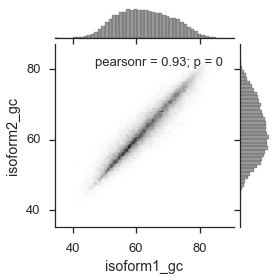

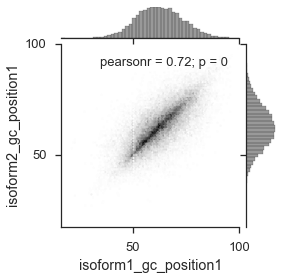

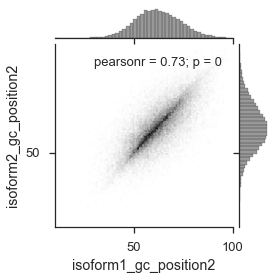

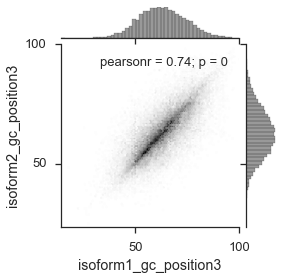

In [26]:
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', context='talk')

for value_col in value_cols:
    g = sns.jointplot('isoform1_{}'.format(value_col), 'isoform2_{}'.format(value_col), 
                  gc_content_2d, kind='hex', joint_kws=dict(mincnt=1), color='black', size=4)
    g.ax_joint.locator_params(nbins=4)
    g.savefig('{}/{}_jointplot.pdf'.format(figure_folder, value_col))

## Calculate miRNA hybridization

For RNA targets, James Broughton from the Pasquinelli lab recommends `RNAhybrid`, and to use just the first 17 nt of the mature miRNA. Wanted to use `fastx-trimmer` but it only takes DNA sequences  - `U`'s are illegal :(

In [16]:
from Bio import SeqIO
import sys
import os

result_seq = []
filename = '/projects/ps-yeolab/genomes/mirbase/release_21/human_mature.fa'
with open(filename) as infile:
    for seq in SeqIO.parse(infile, 'fasta'):
        result_seq.append(seq[:17])

trimmed_filename = '/projects/ps-yeolab/genomes/mirbase/release_21/human_mature_17bp.fa'
with open(trimmed_filename, 'w') as outfile:
    SeqIO.write(result_seq, outfile, 'fasta')

Submit a compute job to calculate microRNA hybridization.

In [17]:
from gscripts.qtools import Submitter

mirna_seqs = '/projects/ps-yeolab/genomes/mirbase/release_21/human_mature_17bp.fa'
rnahybrid_results = '/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/se_exon2_RNAhybrid_mirbase_human_mature_17bp.txt'
command = 'RNAhybrid -c -s 3utr_human -q {} -t {} > {}'.format(mirna_seqs, transcribed_fasta, rnahybrid_results)
sub = Submitter([command], 'RNAhybrid', walltime='120:00:00', write_and_submit=True)

job ID: 3309712


Reading the output takes a LONG time

In [ ]:
%%time
import pandas as pd
from collections import Counter

rnahybrid = pd.read_csv('/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/se_exon2_RNAhybrid_mirbase_human_mature_17bp.txt', 
                        sep=':', 
#                         index_col=[0, 1, 3], 
                        header=None,
                        names=['chrom', 'start-stop', 'exon_length', 'mirna', 'mirna_length',
                                                                 'minimum_free_energy', 'p_value', 'target_bound_start', 'mirna_unbound',
                                                                 'mirna_bound', 'exon_bound', 'exon_bound'])
rnahybrid = rnahybrid.ix[rnahybrid.minimum_free_energy < -28]
grouped = rnahybrid.groupby(['chrom', 'start-stop'])
chrom_startstop_mirna = grouped.mirna.apply(lambda x: ','.join('{}[{}]'.format(k, v) for k,v in Counter(x).items()))
chrom_startstop_mirna.head()